In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Fetch data from DB

In [2]:
from data import get_enhanced_at_bats
from datetime import datetime

enhanced_at_bats = get_enhanced_at_bats(from_date = datetime(2015, 1, 1))
enhanced_at_bats

Found MongoDB password in MongoDB.txt


events  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2015-04-05 413661  False STL  CHC      1      572761 452657      field_out   
                                       2      518792 452657         double   
                                       3      407812 452657         single   
                                       4      425509 452657      strikeout   
                                       5      571431 452657      strikeout   
...                                                                    ...   
2023-09-06 716701  True  WSH  NYM      67     642086 548384      field_out   
                                       71     666198 641360           walk   
                                       72     666906 641360   hit_by_pitch   
                                       73     545121 641360       sac_bunt   
                                       74     696285 641360         single   

                                                                rhb    rhp  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2015-04-05 413661  False STL  CHC      1      572761 452657   False  False   
                                       2      518792 452657   False  False   
                                       3      407812 452657    True  False   
                                       4      425509 452657    True  False   
                                       5      571431 452657   False  False   
...                                                             ...    ...   
2023-09-06 716701  True  WSH  NYM      67     642086 548384   False  False   
                                       71     666198 641360    True   True   
                                       72     666906 641360   False   True   
                                       73     545121 641360   False   True   
                                       74     696285 641360    True   True   

                                                                xBA  opp_sp  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     NaN  452657   
                                       2      518792 452657     NaN  452657   
                                       3      407812 452657     NaN  452657   
                                       4      425509 452657     NaN  452657   
                                       5      571431 452657     NaN  452657   
...                                                             ...     ...   
2023-09-06 716701  True  WSH  NYM      67     642086 548384   0.303  676130   
                                       71     666198 641360     NaN  676130   
                                       72     666906 641360     NaN  676130   
                                       73     545121 641360   0.240  676130   
                                       74     696285 641360   0.094  676130   

                                                             bats  hp_to_1b  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     L      4.28   
                                       2      518792 452657     L      4.36   
                                       3      407812 452657     R      4.54   
                                       4      425509 452657     R      4.75   
                                       5      571431 452657     L      4.71   
...                                                           ...       ...   
2023-09-06 716701  True  WSH  NYM      67     642086 548384     L      4.58   
                                       71     666198 641360     R      4.65   
                                       72     666906 641360     L      4.38   
                                       73     545121 641360     S      4.44   
                                       74     696285 641360   

# Initialize classifier

In [3]:
from model import BTSBatterClassifier
from sklearn.linear_model import LogisticRegressionCV

log_reg = BTSBatterClassifier(LogisticRegressionCV(cv = 10, random_state = 57), at_bats_df = enhanced_at_bats, pkl_name = 'log_reg')

# Batter per game and per PA aggregations

In [4]:
log_reg.batter_per_game_agg()

G_last_50G  HG%_last_50G  xHG%_last_50G  \
game_date  game_pk home  batter                                            
2015-04-05 413661  False 407812           0      0.000000       0.000000   
                         425509           0      0.000000       0.000000   
                         425794           0      0.000000       0.000000   
                         425877           0      0.000000       0.000000   
                         445055           0      0.000000       0.000000   
...                                     ...           ...            ...   
2023-09-06 716701  True  663905           6      0.833333       0.333333   
                         666198          50      0.540000       0.360000   
                         666906          27      0.740741       0.370370   
                         682928          50      0.680000       0.400000   
                         696285           9      0.777778       0.222222   

                                 PA/G_last_50G  BIP/G_last_50G  H/G_last_50G  \
game_date  game_pk home  batter                                                
2015-04-05 413661  False 407812       0.000000        0.000000      0.000000   
                         425509       0.000000        0.000000      0.000000   
                         425794       0.000000        0.000000      0.000000   
                         425877       0.000000        0.000000      0.000000   
                         445055       0.000000        0.000000      0.000000   
...                                        ...             ...           ...   
2023-09-06 716701  True  663905       3.833333        2.833333      0.833333   
                         666198       4.160000        2.720000      0.700000   
                         666906       3.777778        2.666667      0.962963   
                         682928       4.500000        3.480000      1.060000   
                         696285       3.888889        2.666667      0.888889   

                                 xH/G_last_50G  
game_date  game_pk home  batter                 
2015-04-05 413661  False 407812       0.000000  
                         425509       0.000000  
                         425794       0.000000  
                         425877       0.000000  
                         445055       0.000000  
...                                        ...  
2023-09-06 716701  True  663905       0.813167  
                         666198       0.800080  
                         666906       0.887370  
                         682928       1.059980  
                         696285       0.796667  

[341482 rows x 7 columns]

In [5]:
log_reg.batter_per_pa_agg()

PA_last_200PA  BIP/PA_last_200PA  H/PA_last_200PA  \
game_date  game_pk batter                                                      
2015-04-05 413661  407812              0           0.000000         0.000000   
                   424325              0           0.000000         0.000000   
                   425509              0           0.000000         0.000000   
                   425794              0           0.000000         0.000000   
                   425877              0           0.000000         0.000000   
...                                  ...                ...              ...   
2023-09-06 716701  669743            200           0.725000         0.155000   
                   677595             15           0.866667         0.400000   
                   682928            200           0.760000         0.215000   
                   683146            200           0.605000         0.180000   
                   696285             35           0.685714         0.228571   

                           xH/PA_last_200PA  
game_date  game_pk batter                    
2015-04-05 413661  407812          0.000000  
                   424325          0.000000  
                   425509          0.000000  
                   425794          0.000000  
                   425877          0.000000  
...                                     ...  
2023-09-06 716701  669743          0.183905  
                   677595          0.362400  
                   682928          0.222350  
                   683146          0.183215  
                   696285          0.204857  

[416760 rows x 4 columns]

# Pitcher and bullpen per BF aggregations

In [6]:
log_reg.pitcher_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk pitcher                                                 
2015-04-05 413661  425794               0       0.000000        0.000000   
                   435400               0       0.000000        0.000000   
                   444468               0       0.000000        0.000000   
                   452657               0       0.000000        0.000000   
                   457435               0       0.000000        0.000000   
...                                   ...            ...             ...   
2023-09-06 716701  641627             200       0.265000        0.085000   
                   666168             200       0.175000        0.115000   
                   672851             200       0.190000        0.095000   
                   676130              92       0.163043        0.173913   
                   676395              77       0.259740        0.064935   

                            H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk pitcher                                     
2015-04-05 413661  425794          0.000000          0.000000  
                   435400          0.000000          0.000000  
                   444468          0.000000          0.000000  
                   452657          0.000000          0.000000  
                   457435          0.000000          0.000000  
...                                     ...               ...  
2023-09-06 716701  641627          0.250000          0.214185  
                   666168          0.275000          0.230600  
                   672851          0.245000          0.231575  
                   676130          0.228261          0.222163  
                   676395          0.233766          0.223870  

[171249 rows x 5 columns]

In [7]:
log_reg.bullpen_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk opponent                                                 
2015-04-05 413661  CHC                   0          0.000           0.000   
                   STL                   0          0.000           0.000   
2015-04-06 413649  LAA                   0          0.000           0.000   
                   SEA                   0          0.000           0.000   
           413650  ATL                   0          0.000           0.000   
...                                    ...            ...             ...   
2023-09-06 716699  SF                  200          0.190           0.085   
           716700  CLE                 200          0.215           0.090   
                   MIN                 200          0.210           0.115   
           716701  NYM                 200          0.280           0.135   
                   WSH                 200          0.185           0.045   

                             H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk opponent                                     
2015-04-05 413661  CHC                 0.000          0.000000  
                   STL                 0.000          0.000000  
2015-04-06 413649  LAA                 0.000          0.000000  
                   SEA                 0.000          0.000000  
           413650  ATL                 0.000          0.000000  
...                                      ...               ...  
2023-09-06 716699  SF                  0.240          0.228990  
           716700  CLE                 0.250          0.218825  
                   MIN                 0.165          0.198235  
           716701  NYM                 0.170          0.175890  
                   WSH                 0.260          0.239525  

[39516 rows x 5 columns]

# Fit classifier

In [8]:
log_reg.fit_model(scale_features = True, perform_pca = True)

Initial 35 features: hp_to_1b, HG%_last_50G, xHG%_last_50G, PA/G_last_50G, BIP/G_last_50G, H/G_last_50G, xH/G_last_50G, HG%_last_50G_home_away, xHG%_last_50G_home_away, PA/G_last_50G_home_away, BIP/G_last_50G_home_away, H/G_last_50G_home_away, xH/G_last_50G_home_away, BIP/PA_last_200PA, H/PA_last_200PA, xH/PA_last_200PA, BIP/PA_last_200PA_vs_hp, H/PA_last_200PA_vs_hp, xH/PA_last_200PA_vs_hp, K%_last_200BF, BB%_last_200BF, H/PA_last_200BF, xH/PA_last_200BF, K%_last_200BF_vs_hb, BB%_last_200BF_vs_hb, H/PA_last_200BF_vs_hb, xH/PA_last_200BF_vs_hb, K%_last_200BF_bullpen, BB%_last_200BF_bullpen, H/PA_last_200BF_bullpen, xH/PA_last_200BF_bullpen, PA_last_200PA_vs_opp_sp, BIP/PA_last_200PA_vs_opp_sp, H/PA_last_200PA_vs_opp_sp, xH/PA_last_200PA_vs_opp_sp
PCA: # of features reduced from 35 to 28
Score on training data: 0.648
Score on testing data: 0.647


# Simulate results on test data

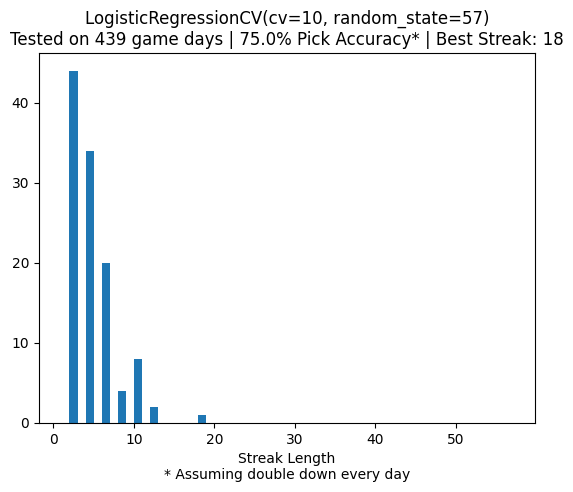

In [9]:
log_reg.simulate_results()

# Get predictions for today

In [10]:
todays_predictions = log_reg.todays_predictions()
todays_predictions

GET https://www.mlb.com/apps/beat-the-streak/game/json/units.json (200) 0.25s
GET https://www.mlb.com/apps/beat-the-streak/game/json/squads.json (200) 0.14s
GET https://www.mlb.com/apps/beat-the-streak/game/json/players.json (200) 0.13s


lineup  \
game_date           game_pk home  team opponent batter           
2023-09-07 19:15:00 716680  True  ATL  STL      660670       0   
                                                663586       0   
                                                671739       0   
                                                645277       0   
2023-09-07 18:35:00 716682  False LAD  MIA      518692       0   
...                                                        ...   
2023-09-07 19:35:00 716685  False AZ   CHC      645444       0   
2023-09-07 19:00:00 716686  True  NYY  DET      666163       0   
2023-09-07 18:35:00 716683  True  TB   SEA      666018       0   
2023-09-07 19:00:00 716686  False DET  NYY      663527       0   
2023-09-07 18:35:00 716682  True  MIA  LAD      607732       0   

                                                                     name  \
game_date           game_pk home  team opponent batter                      
2023-09-07 19:15:00 716680  True  ATL  STL      660670   Ronald Acuña Jr.   
                                                663586       Austin Riley   
                                                671739  Michael Harris II   
                                                645277       Ozzie Albies   
2023-09-07 18:35:00 716682  False LAD  MIA      518692    Freddie Freeman   
...                                                                   ...   
2023-09-07 19:35:00 716685  False AZ   CHC      645444       Jose Herrera   
2023-09-07 19:00:00 716686  True  NYY  DET      666163       Ben Rortvedt   
2023-09-07 18:35:00 716683  True  TB   SEA      666018    Jonathan Aranda   
2023-09-07 19:00:00 716686  False DET  NYY      663527        Tyler Nevin   
2023-09-07 18:35:00 716682  True  MIA  LAD      607732    Jacob Stallings   

                                                       bats  opp_sp  \
game_date           game_pk home  team opponent batter                
2023-09-07 19:15:00 716680  True  ATL  STL      660670    R  425794   
                                                663586    R  425794   
                                                671739    L  425794   
                                                645277    S  425794   
2023-09-07 18:35:00 716682  False LAD  MIA      518692    L  666129   
...                                                     ...     ...   
2023-09-07 19:35:00 716685  False AZ   CHC      645444    S  665871   
2023-09-07 19:00:00 716686  True  NYY  DET      666163    L  593958   
2023-09-07 18:35:00 716683  True  TB   SEA      666018    L  622491   
2023-09-07 19:00:00 716686  False DET  NYY      663527    R  607074   
2023-09-07 18:35:00 716682  True  MIA  LAD      607732    R  686752   

                                                              opp_sp_name  \
game_date           game_pk home  team opponent batter                      
2023-09-07 19:15:00 716680  True  ATL  STL      660670    Adam Wainwright   
                                                663586    Adam Wainwright   
                                                671739    Adam Wainwright   
                                                645277    Adam Wainwright   
2023-09-07 18:35:00 716682  False LAD  MIA      518692    Braxton Garrett   
...                                                                   ...   
2023-09-07 19:35:00 716685  False AZ   CHC      645444       Javier Assad   
2023-09-07 19:00:00 716686  True  NYY  DET      666163  Eduardo Rodriguez   
2023-09-07 18:35:00 716683  True  TB   SEA      666018      Luis Castillo   
2023-09-07 19:00:00 716686  False DET  NYY      663527       Carlos Rodón   
2023-09-07 18:35:00 716682  True  MIA  LAD      607732        Ryan Pepiot   

                                                       opp_sp_throws  \
game_date           game_pk home  team opponent batter                 
2023-09-07 19:15:00 716680  True  ATL  STL      660670             R   
                                                66358